In [122]:
import radiomics as rm
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing

In [123]:
df_cancer = pd.read_csv('features.csv', sep=';')

In [124]:
df_cancer.head()

,Unnamed: 0,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,metastases
0,0,0.730057,0.547390,46.111107,84.238088,94.916393,82.904318,95.048181,95.453350,156058.192253,...,65.890341,1583.334962,64.282088,114939.612603,0.102407,0.002637,0.186916,206.427211,0.000523,0.0
1,1,0.880026,0.755086,70.050510,92.771551,116.811054,101.661967,103.566608,125.188825,359165.698933,...,88.444688,1651.377715,76.437748,142846.540839,0.052014,0.001332,0.142663,165.984345,0.000334,0.0
2,2,0.541368,0.349893,25.216240,72.068431,56.708364,83.506157,62.535632,83.967822,34629.834720,...,99.383954,1355.354470,25.568303,43154.784522,0.019421,0.001525,0.304123,311.508421,0.000710,2.0
3,3,0.490820,0.287317,30.821869,107.274834,110.729228,110.003931,68.533539,117.543366,84214.687347,...,43.820066,1533.333966,40.228007,68201.600149,0.026679,0.001167,0.202153,253.308845,0.000398,2.0
4,4,0.710922,0.448589,35.245066,78.568642,77.737209,87.455405,85.094400,103.629893,83150.790783,...,56.427838,1785.882712,43.938237,85015.211818,0.027079,0.001295,0.193209,277.260954,0.000468,0.0


In [125]:
df_cancer.isnull().sum()

Unnamed: 0                                            0
original_shape_Elongation                             0
original_shape_Flatness                               0
original_shape_LeastAxisLength                        0
original_shape_MajorAxisLength                        0
                                                     ..
original_gldm_LowGrayLevelEmphasis                    0
original_gldm_SmallDependenceEmphasis                 0
original_gldm_SmallDependenceHighGrayLevelEmphasis    0
original_gldm_SmallDependenceLowGrayLevelEmphasis     0
metastases                                            0
Length: 102, dtype: int64

In [126]:
df_cancer.dtypes

Unnamed: 0                                              int64
original_shape_Elongation                             float64
original_shape_Flatness                               float64
original_shape_LeastAxisLength                        float64
original_shape_MajorAxisLength                        float64
                                                       ...   
original_gldm_LowGrayLevelEmphasis                    float64
original_gldm_SmallDependenceEmphasis                 float64
original_gldm_SmallDependenceHighGrayLevelEmphasis    float64
original_gldm_SmallDependenceLowGrayLevelEmphasis     float64
metastases                                            float64
Length: 102, dtype: object

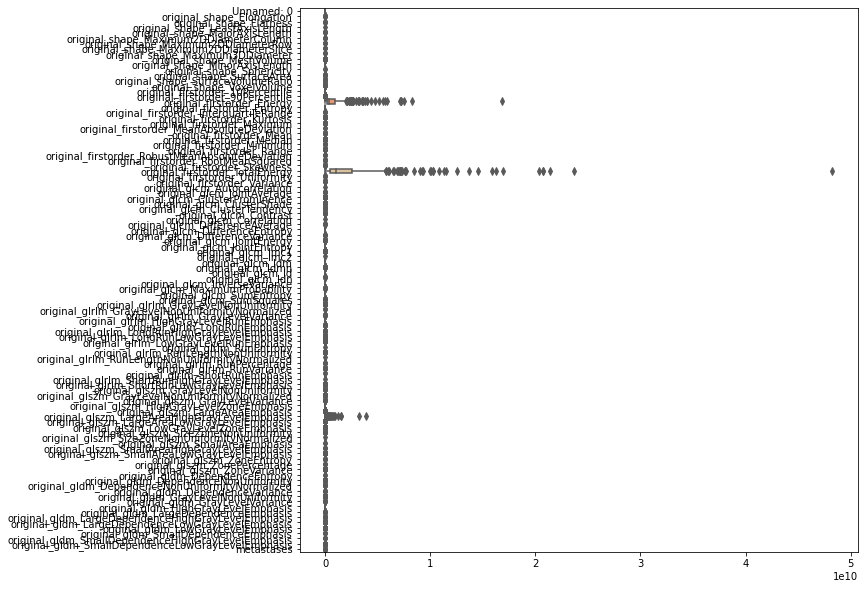

In [127]:
## variables distribution visualization
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_cancer, orient="h", palette="Set2")

In [128]:
cancer_info = pd.read_csv('NSCLC Radiomics Lung1.clinical-version3-Oct 2019.csv')
cancer_info

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1
...,...,...,...,...,...,...,...,...,...,...
417,LUNG1-418,53.6712,2.0,0,0,I,adenocarcinoma,male,346,1
418,LUNG1-419,66.5096,4.0,1,0,IIIb,squamous cell carcinoma,male,2772,0
419,LUNG1-420,73.3808,2.0,1,0,II,squamous cell carcinoma,male,2429,1
420,LUNG1-421,61.7041,2.0,2,0,IIIa,squamous cell carcinoma,female,369,1


In [129]:
df_cancer = df_cancer.join(cancer_info)
df_cancer.dropna(inplace = True)

In [130]:
y_hist = df_cancer['Histology']
y_life_exp = df_cancer['Survival.time']
df_cancer = df_cancer.drop(['Unnamed: 0', 'PatientID', 'age', 'clinical.T.Stage', 'Clinical.N.Stage', 'Clinical.M.Stage', 'Histology', 'Overall.Stage', 'gender', 'Survival.time', 'deadstatus.event'], axis=1)
df_cancer.isnull().sum()

original_shape_Elongation                             0
original_shape_Flatness                               0
original_shape_LeastAxisLength                        0
original_shape_MajorAxisLength                        0
original_shape_Maximum2DDiameterColumn                0
                                                     ..
original_gldm_LowGrayLevelEmphasis                    0
original_gldm_SmallDependenceEmphasis                 0
original_gldm_SmallDependenceHighGrayLevelEmphasis    0
original_gldm_SmallDependenceLowGrayLevelEmphasis     0
metastases                                            0
Length: 101, dtype: int64

In [131]:
# from sklearn.preprocessing import LabelEncoder
#
# lb_make = LabelEncoder()
# df_cancer["gender"] = lb_make.fit_transform(df_cancer["gender"])

In [132]:
# seg = df_cancer['Histology']
# dum = pd.get_dummies(df_cancer.loc[:, df_cancer.columns != 'Histology'] )
# dum['Histology'] = seg
# df_cancer = dum

## Trying random forest with hyperparameters customization for the traget Histology

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cancer, y_hist)

# train, test = train_test_split(df_cancer, random_state=0)
#
# X_train = train.loc[:, train.columns != 'Histology']
# y_train = train['Histology']
#
# X_test = test.loc[:, train.columns != 'Histology']
# y_test = test['Histology']

In [134]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(df_cancer, y_hist)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.381056 using {'max_features': 'log2', 'n_estimators': 100}
0.334184 (0.062848) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.356406 (0.060704) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.370971 (0.056150) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.313514 (0.069464) with: {'max_features': 'log2', 'n_estimators': 10}
0.381056 (0.061343) with: {'max_features': 'log2', 'n_estimators': 100}
0.359009 (0.059741) with: {'max_features': 'log2', 'n_estimators': 1000}


In [135]:
# rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
# rnd_clf.fit(X_train, y_train)
#
# for name, score in zip(df_cancer.columns, rnd_clf.feature_importances_):
#   print(name, score)

In [136]:
rf = RandomForestClassifier(n_estimators= 100, max_features='sqrt', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', random_state=0)

In [137]:
y_hist.unique()

array(['large cell', 'squamous cell carcinoma', 'adenocarcinoma', 'nos'],
      dtype=object)

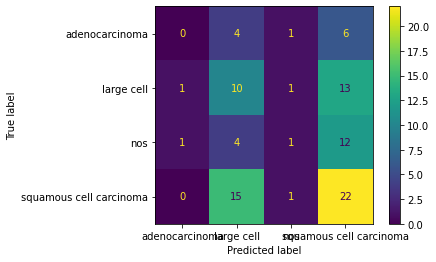

                         precision    recall  f1-score   support

             large cell       0.00      0.00      0.00        11
squamous cell carcinoma       0.30      0.40      0.34        25
         adenocarcinoma       0.25      0.06      0.09        18
                    nos       0.42      0.58      0.48        38

               accuracy                           0.36        92
              macro avg       0.24      0.26      0.23        92
           weighted avg       0.30      0.36      0.31        92



In [138]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


plot_confusion_matrix(rf, X_test, y_test)
plt.show()

pred_rf = rf.predict(X_test)
print(classification_report(y_test, pred_rf, target_names=['large cell', 'squamous cell carcinoma', 'adenocarcinoma', 'nos']))

## SWM

In [139]:
# # ANOVA feature selection for numeric input and categorical output
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
#
# # define feature selection
# fs = SelectKBest(score_func=f_classif, k=20)
# # apply feature selection
# X_selected = fs.fit_transform(X_train, y_train)
# print(X_selected.shape)
# X_train = X_selected

In [140]:
# # example of grid searching key hyperparameters for SVC
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# # define model and parameters
# model = SVC()
# kernel = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gamma = ['scale']
# # define grid search
# grid = dict(kernel=kernel,C=C,gamma=gamma)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [141]:
# sig = SVC(kernel='sigmoid', C=0.1, gamma='scale').fit(X_train, y_train)
#
# plot_confusion_matrix(sig, X_test, y_test)
# plt.show()
#
# pred_sig = sig.predict(X_test)
# print(classification_report(y_test, pred_sig, target_names=['large cell', 'squamous cell carcinoma', 'adenocarcinoma', 'nos']))

## SWM Regression for Survival.time

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97723099.69108051, tolerance: 29699.889528205134
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98190408.92977327, tolerance: 29699.889528205134
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98610731.21433963, tolerance: 29699.889528205134
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appd

Minimum test-MSE = 1253176.8546077576


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110217606.4788485, tolerance: 29699.889528205134
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110974564.22546569, tolerance: 29699.889528205134
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111467994.14700179, tolerance: 29699.889528205134
  model = cd_fast.enet_coordinate_descent(


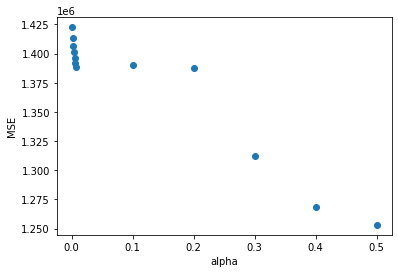

In [143]:
X_train, X_test, y_train, y_test = train_test_split(df_cancer, y_life_exp)

from sklearn.linear_model import Lasso
alphas=[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008, 0.1, 0.2, 0.3, 0.4, 0.5]
mse_values=[]

for alpha in alphas:
  lasso_model = Lasso(alpha=alpha)
  lasso_model.fit(X_train, y_train)
  y_predict=lasso_model.predict(X_test)
  mse_values.append(mean_squared_error(y_test, y_predict))

plt.scatter(alphas, mse_values)
plt.xlabel('alpha')
plt.ylabel("MSE")

print("Minimum test-MSE = {}".format(np.min(mse_values)))

In [144]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred=lasso_model.predict(X_test)

c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107543116.30566576, tolerance: 29699.889528205134
  model = cd_fast.enet_coordinate_descent(


In [145]:
print("Test RMSE = {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("Test R2 = {}".format(r2_score(y_test, y_pred)))
print("Train RMSE = {}".format(np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train)))))
print("Train R2 = {}".format(r2_score(y_train, lasso_model.predict(X_train))))

Test RMSE = 1179.2389461092914
Test R2 = -0.4029271164371193
Train RMSE = 873.3642836961869
Train R2 = 0.29886980970715304


In [146]:
import pickle
# Dump the trained decision tree classifier with Pickle
rf_pkl_filename = 'rf_classifier.pkl'
# Open the file to save as pkl file
rf_model_pkl = open(rf_pkl_filename, 'wb')
pickle.dump(rf, rf_model_pkl)
# Close the pickle instances
rf_model_pkl.close()

In [147]:
# Dump the trained decision tree classifier with Pickle
lasso_pkl_filename = 'lasso_regression.pkl'
# Open the file to save as pkl file
lasso_model_pkl = open(lasso_pkl_filename, 'wb')
pickle.dump(lasso_model, lasso_model_pkl)
# Close the pickle instances
lasso_model_pkl.close()
